  state                                     county  total_votes  dem_votes  \
0    AK  State House District 8, Denali-University        10320       4995   

   rep_votes  other_votes  dem_share east_west  
0       4983          342      50.06      west  
     state              county  total_votes  dem_votes  rep_votes  \
2372    CA  Los Angeles County      3318248    2295853     956425   
771     IL         Cook County      2137466    1629024     487736   
2507    AZ     Maricopa County      1364962     602166     746448   
2589    CA    San Diego County      1231047     666581     541032   
3031    TX       Harris County      1171472     590982     571883   

      other_votes  dem_share east_west  
2372        65970      70.61      west  
771         20706      76.96      east  
2507        16348      44.64      west  
2589        23434      55.20      west  
3031         8607      50.82      west  


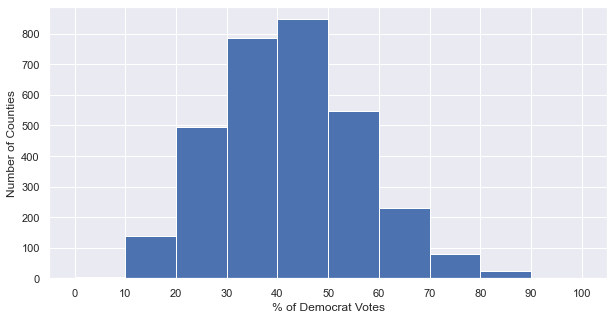

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
states= pd.read_csv('States.csv')

print(states.head(1))
print(states.sort_values('total_votes', ascending=False).head())
# Set default Seaborn style
sns.set()

bin_edges=[0,10,20,30,40,50,60,70,80,90,100]

fig, ax= plt.subplots()
fig.set_size_inches([10,5])
_=plt.hist(states['dem_share'], bins=bin_edges)
_=plt.xlabel('% of Democrat Votes')
_=plt.ylabel('Number of Counties')

# Change the number of tickles in the x axis
plt.locator_params(axis="x", nbins=20)

plt.show()

['AK' 'MN' 'WA' 'MT' 'ID' 'ND' 'MI' 'ME' 'WI' 'OR' 'SD' 'NH' 'VT' 'NY'
 'WY' 'IA' 'NE' 'MA' 'IL' 'PA' 'CT' 'RI' 'CA' 'UT' 'NV' 'OH' 'IN' 'NJ'
 'CO' 'WV' 'MO' 'KS' 'DE' 'MD' 'VA' 'KY' 'DC' 'AZ' 'OK' 'NM' 'TN' 'NC'
 'TX' 'AR' 'SC' 'AL' 'GA' 'MS' 'LA' 'FL' 'HI']
['AK' 'MN' 'WA' 'MT' 'NY' 'CA' 'VA' 'AZ' 'OK' 'NM' 'NC' 'FL' 'HI']


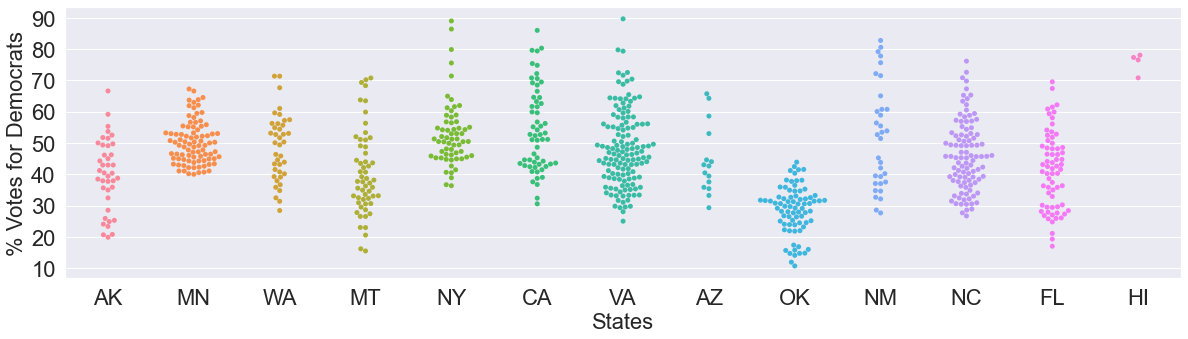

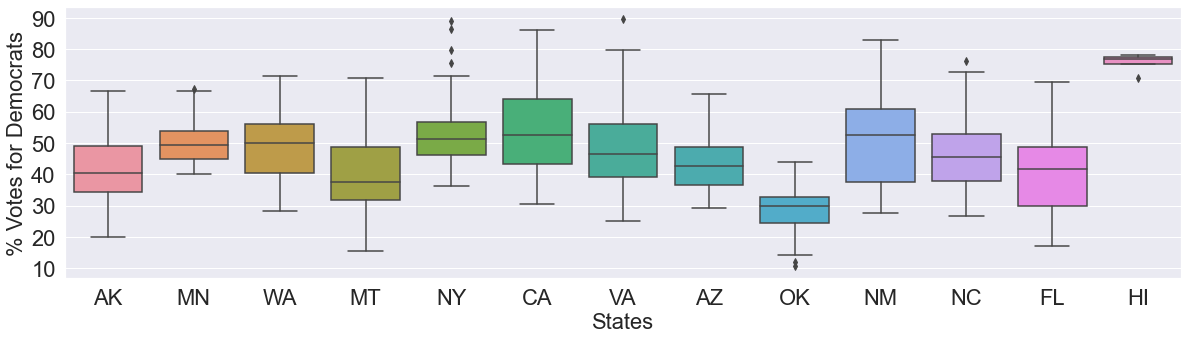

In [2]:
print(states['state'].unique())
sts=['CA', 'NY', 'AZ', 'FL', 'AK', 'MN', 'WA', 'MT', 'OK', 'NM', 'VA', 'HI', 'NC']

## Filter the datafram from a list
instates= states[states['state'].isin(sts)]
print(instates['state'].unique())

fig, ax= plt.subplots()
fig.set_size_inches([20,5])
sns.swarmplot(x='state', y='dem_share', data=instates)
plt.xlabel('States', fontsize= 22)
plt.ylabel('% Votes for Democrats', fontsize= 22)
plt.xticks(fontsize= 22, rotation=0)
plt.yticks(fontsize= 22, rotation=0)


fig, ax= plt.subplots()
fig.set_size_inches([20,5])
sns.boxplot(x='state', y='dem_share', data=instates)
plt.xlabel('States', fontsize= 22)
plt.ylabel('% Votes for Democrats', fontsize= 22)
plt.xticks(fontsize= 22, rotation=0)
plt.yticks(fontsize= 22, rotation=0)

plt.show()



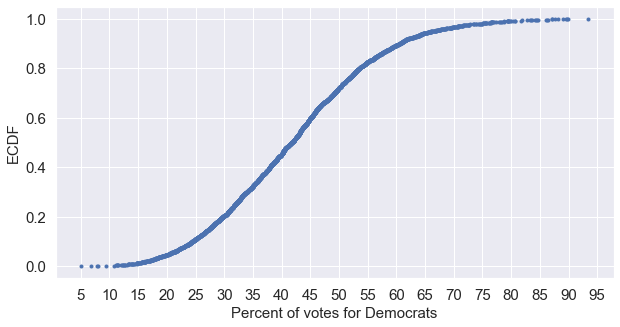

In [3]:
x= np.sort(states['dem_share'])
y= np.arange(1, len(x)+1)/len(x)

fig, ax= plt.subplots()
fig.set_size_inches([10,5])
plt.plot(x,y, marker='.', linestyle='none')
plt.xlabel('Percent of votes for Democrats', fontsize= 15)
plt.ylabel('ECDF', fontsize= 15)
plt.locator_params(axis="x", nbins=20)
plt.xticks(fontsize= 15, rotation=0)
plt.yticks(fontsize= 15, rotation=0)
plt.show()

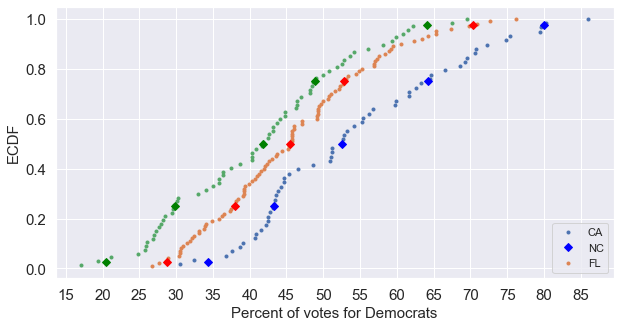

In [4]:
percentiles= np.array([2.5, 25, 50, 75, 97.5])

ca= states[states['state']=='CA']
state1= ca['dem_share']
ptiles_ca = np.percentile(state1, percentiles)


nc= states[states['state']=='NC']
state2= nc['dem_share']
ptiles_nc = np.percentile(state2, percentiles)

fl= states[states['state']=='FL']
state3= fl['dem_share']
ptiles_fl = np.percentile(state3, percentiles)


def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)

    # x-data for the ECDF: x
    x = np.sort(data)

    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n

    return x, y

x1, y1= ecdf(state1)
x2, y2= ecdf(state2)
x3, y3= ecdf(state3)
fig, ax= plt.subplots()
fig.set_size_inches([10,5])
plt.plot(x1, y1, marker='.', linestyle='none')
plt.plot(ptiles_ca, percentiles/100, marker='D', color='blue', linestyle= 'none')
plt.plot(x2, y2, marker='.', linestyle='none')
plt.plot(ptiles_nc, percentiles/100, marker='D', color='red', linestyle= 'none')
plt.plot(x3, y3, marker='.', linestyle='none')
plt.plot(ptiles_fl, percentiles/100, marker='D', color='green', linestyle= 'none')


plt.legend(('CA','NC', 'FL'), loc= 'lower right')
plt.xlabel('Percent of votes for Democrats', fontsize= 15)
plt.ylabel('ECDF', fontsize= 15)
plt.locator_params(axis="x", nbins=20)
plt.xticks(fontsize= 15, rotation=0)
plt.yticks(fontsize= 15, rotation=0)
plt.show()

0.286200483788138


<AxesSubplot:xlabel='total_votes', ylabel='dem_share'>

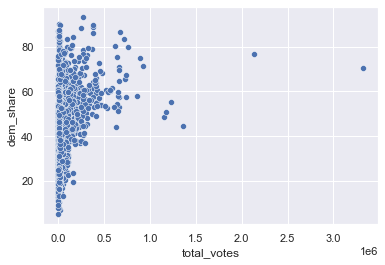

In [5]:
def pearson_r(x, y):
    """Compute Pearson correlation coefficient between two arrays."""
    # Compute correlation matrix: corr_mat
    corr_mat= np.corrcoef(x,y)


    # Return entry [0,1]
    return corr_mat[0,1]

# Compute Pearson correlation coefficient for I. versicolor: r
r= pearson_r(states['total_votes'], states['dem_share'])

# Print the result
print(r)

sns.scatterplot(x= states['total_votes'], y= states['dem_share'])

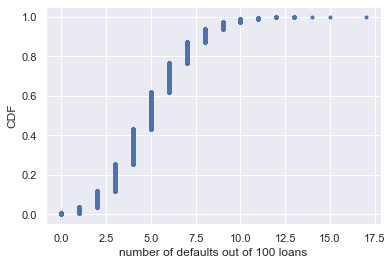

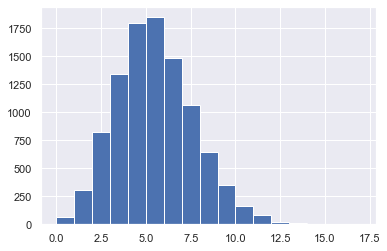

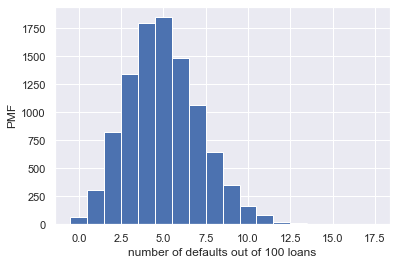

24
0
10000


In [6]:
# Take 10,000 samples out of the binomial distribution: n_defaults
n_defaults = np.random.binomial(n=100, p=0.05, size=10000)

# Compute CDF: x, y
x, y = ecdf(n_defaults)

# Plot the CDF with axis labels
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('CDF')

# Show the plot
plt.show()

plt.hist(n_defaults, bins= len(pd.unique(n_defaults)))
plt.show()


#OR 

# Compute bin edges: bins
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5

# Generate histogram
_ = plt.hist(n_defaults, bins=bins)

# Label axes
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('PMF')

# Show the plot
plt.show()

#The first number is the mean the second the size
samples_poisson = np.random.poisson(10, size=10000)

print(samples_poisson.max())
print(samples_poisson.min())
print(len(samples_poisson))




In [7]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters= np.random.poisson(251/115, size=10000)

# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters>=7)

# Compute probability of getting seven or more: p_large
p_large= n_large/ len(n_nohitters)

# Print the result
print('Probability of seven or more no-hitters:', p_large*100,"%")



Probability of seven or more no-hitters: 0.64 %


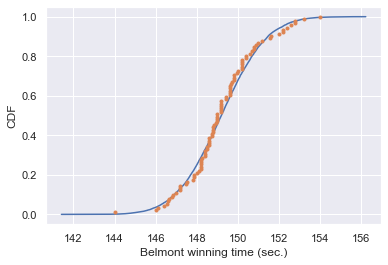

In [8]:
import datetime
belmont= pd.read_csv('belmont.csv')
# date_time= datetime.datetime.strptime(belmont.Time, "%H:%M:%S")
time_string = list(belmont.Time)

belmont_no_outliers = []

for a in time_string:
    date_time = datetime.datetime.strptime(a, "%M:%S.%f")
    a_timedelta = date_time - datetime.datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    belmont_no_outliers.append(seconds)
    

belmont_no_outliers= pd.DataFrame(data=belmont_no_outliers, columns=['seconds'])
belmont_no_outliers= belmont_no_outliers.sort_values(by= 'seconds')
belmont_no_outliers= belmont_no_outliers.reset_index(drop=True)
# Compute mean and standard deviation: mu, sigma
mu= belmont_no_outliers.mean()
sigma= belmont_no_outliers.std()


# Sample out of a normal distribution with this mu and sigma: samples
samples= np.random.normal(mu, sigma, size=10000)

# Get the CDF of the samples and of the data
x_theor, y_theor= ecdf(samples)
x, y= ecdf(belmont_no_outliers)


# Plot the CDFs and show the plot
_ = plt.plot(x_theor, y_theor)
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.xlabel('Belmont winning time (sec.)')
_ = plt.ylabel('CDF')
plt.show()

a    object
dtype: object

dtype('float64')

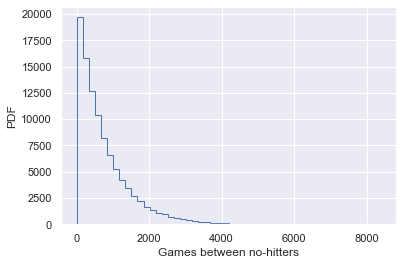

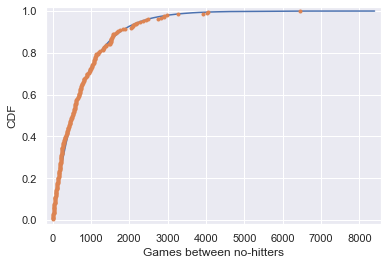

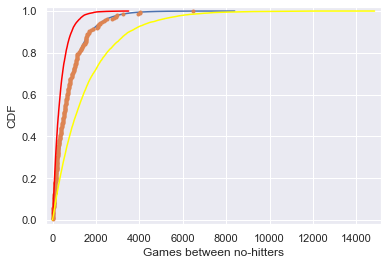

In [9]:
txt= """843 1613 1101  215  684  814  278  324  161  219  545  715  966  624
   29  450  107   20   91 1325  124 1468  104 1309  429   62 1878 1104
  123  251   93  188  983  166   96  702   23  524   26  299   59   39
   12    2  308 1114  813  887  645 2088   42 2090   11  886 1665 1084
 2900 2432  750 4021 1070 1765 1322   26  548 1525   77 2181 2752  127
 2147  211   41 1575  151  479  697  557 2267  542  392   73  603  233
  255  528  397 1529 1023 1194  462  583   37  943  996  480 1497  717
  224  219 1531  498   44  288  267  600   52  269 1086  386  176 2199
  216   54  675 1243  463  650  171  327  110  774  509    8  197  136
   12 1124   64  380  811  232  192  731  715  226  605  539 1491  323
  240  179  702  156   82 1397  354  778  603 1001  385  986  203  149
  576  445  180 1403  252  675 1351 2983 1568   45  899 3260 1025   31
  100 2055 4043   79  238 3931 2351  595  110  215    0  563  206  660
  242  577  179  157  192  192 1848  792 1693   55  388  225 1134 1172
 1555   31 1582 1044  378 1687 2915  280  765 2819  511 1521  745 2491
  580 2072 6450  578  745 1075 1103 1549 1520  138 1202  296  277  351
  391  950  459   62 1056 1128  139  420   87   71  814  603 1349  162
 1027  783  326  101  876  381  905  156  419  239  119  129  467"""

nohitter_times= txt.split()
nohitter_times=pd.DataFrame(nohitter_times, columns=['a'])
display(nohitter_times.dtypes)
nohitter_times= nohitter_times.a.astype('float')
display(nohitter_times.dtypes)

# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)


# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_time = np.random.exponential(tau, 100000)

# Plot the PDF and label axes
plt.hist(inter_nohitter_time, bins= 50, histtype='step')
plt.xlabel('Games between no-hitters')
plt.ylabel('PDF')

# Show the plot
plt.show()


# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)

# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_time)

# Overlay the plots
plt.plot(x_theor, y_theor)
plt.plot(x,y , marker='.', linestyle='none')

# Margins and axis labels
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Show the plot
plt.show()

# Plot the theoretical CDFs
plt.plot(x_theor, y_theor)
plt.plot(x, y, marker='.', linestyle='none')
plt.margins(0.02)
plt.xlabel('Games between no-hitters')
plt.ylabel('CDF')

# Take samples with half tau: samples_half
samples_half = np.random.exponential(tau/2, 10000)

# Take samples with double tau: samples_double
samples_double = np.random.exponential(tau*2, 10000)

# Generate CDFs from these samples
x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

# Plot these CDFs as lines
_ = plt.plot(x_half, y_half, color='red')
_ = plt.plot(x_double, y_double, color='yellow')

# Show the plot
plt.show()

a    object
dtype: object

a    object
dtype: object

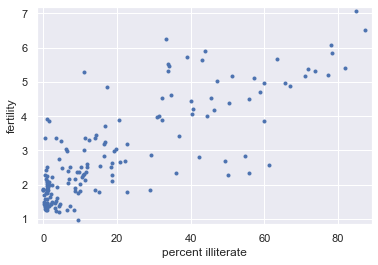

0.8041324026815347


In [10]:
q= """ 9.5 49.2  1.  11.2  9.8 60.  50.2 51.2  0.6  1.   8.5  6.1  9.8  1.
 42.2 77.2 18.7 22.8  8.5 43.9  1.   1.   1.5 10.8 11.9  3.4  0.4  3.1
  6.6 33.7 40.4  2.3 17.2  0.7 36.1  1.  33.2 55.9 30.8 87.4 15.4 54.6
  5.1  1.1 10.2 19.8  0.  40.7 57.2 59.9  3.1 55.7 22.8 10.9 34.7 32.2
 43.   1.3  1.   0.5 78.4 34.2 84.9 29.1 31.3 18.3 81.8 39.  11.2 67.
  4.1  0.2 78.1  1.   7.1  1.  29.   1.1 11.7 73.6 33.9 14.   0.3  1.
  0.8 71.9 40.1  1.   2.1  3.8 16.5  4.1  0.5 44.4 46.3 18.7  6.5 36.8
 18.6 11.1 22.1 71.1  1.   0.   0.9  0.7 45.5  8.4  0.   3.8  8.5  2.
  1.  58.9  0.3  1.  14.  47.   4.1  2.2  7.2  0.3  1.5 50.5  1.3  0.6
 19.1  6.9  9.2  2.2  0.2 12.3  4.9  4.6  0.3 16.5 65.7 63.5 16.8  0.2
  1.8  9.6 15.2 14.4  3.3 10.6 61.3 10.9 32.2  9.3 11.6 20.7  6.5  6.7
  3.5  1.   1.6 20.5  1.5 16.7  2.   0.9"""

illiteracy= q.split()
illiteracy=pd.DataFrame(illiteracy, columns=['a'])
display(illiteracy.dtypes)
illiteracy= illiteracy.a.astype('float')

y= """1.769 2.682 2.077 2.132 1.827 3.872 2.288 5.173 1.393 1.262 2.156 3.026
 2.033 1.324 2.816 5.211 2.1   1.781 1.822 5.908 1.881 1.852 1.39  2.281
 2.505 1.224 1.361 1.468 2.404 5.52  4.058 2.223 4.859 1.267 2.342 1.579
 6.254 2.334 3.961 6.505 2.53  2.823 2.498 2.248 2.508 3.04  1.854 4.22
 5.1   4.967 1.325 4.514 3.173 2.308 4.62  4.541 5.637 1.926 1.747 2.294
 5.841 5.455 7.069 2.859 4.018 2.513 5.405 5.737 3.363 4.89  1.385 1.505
 6.081 1.784 1.378 1.45  1.841 1.37  2.612 5.329 5.33  3.371 1.281 1.871
 2.153 5.378 4.45  1.46  1.436 1.612 3.19  2.752 3.35  4.01  4.166 2.642
 2.977 3.415 2.295 3.019 2.683 5.165 1.849 1.836 2.518 2.43  4.528 1.263
 1.885 1.943 1.899 1.442 1.953 4.697 1.582 2.025 1.841 5.011 1.212 1.502
 2.516 1.367 2.089 4.388 1.854 1.748 2.978 2.152 2.362 1.988 1.426 3.29
 3.264 1.436 1.393 2.822 4.969 5.659 3.24  1.693 1.647 2.36  1.792 3.45
 1.516 2.233 2.563 5.283 3.885 0.966 2.373 2.663 1.251 2.052 3.371 2.093
 2.    3.883 3.852 3.718 1.732 3.928"""

fertility= y.split()
fertility=pd.DataFrame(fertility, columns=['a'])
display(fertility.dtypes)
fertility= fertility.a.astype('float')

# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Set the margins and label axes
plt.margins(.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Show the plot
plt.show()

# Show the Pearson correlation coefficient
print(pearson_r(illiteracy, fertility))

slope = 0.049798548090634255 children per woman / percent illiterate
intercept = 1.8880506106365562 children per woman


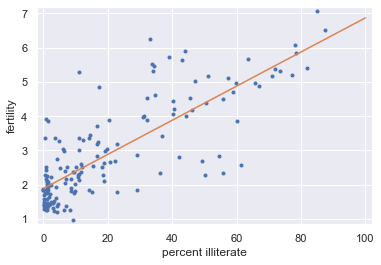

In [11]:
# Plot the illiteracy rate versus fertility
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')
plt.margins(0.02)
_ = plt.xlabel('percent illiterate')
_ = plt.ylabel('fertility')

# Perform a linear regression using np.polyfit(): a, b
a, b = np.polyfit(illiteracy, fertility, 1)

# Print the results to the screen
print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

# Make theoretical line to plot
x = np.array([0,100])
y = a * x + b

# Add regression line to your plot
_ = plt.plot(x, y)

# Draw the plot
plt.show()


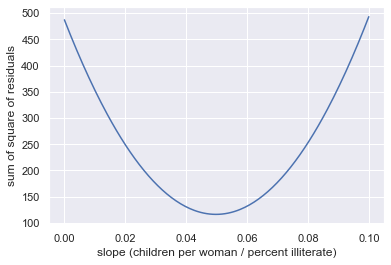

In [12]:
# Specify slopes to consider: a_vals
a_vals = np.linspace(0, 0.1, 200)

# Initialize sum of square of residuals: rss
rss = np.empty_like(a_vals)

# Compute sum of square of residuals for each value of a_vals
for i, a in enumerate(a_vals):
    rss[i] = np.sum((fertility - a*illiteracy - b)**2)

# Plot the RSS
plt.plot(a_vals, rss, '-')
plt.xlabel('slope (children per woman / percent illiterate)')
plt.ylabel('sum of square of residuals')

plt.show()

0.5000909090909094 3.000090909090908


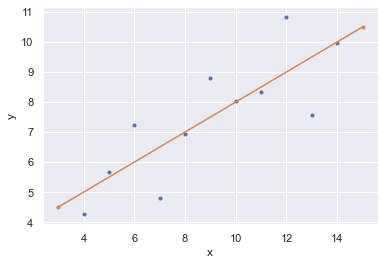

In [13]:
# x = []
# for i in range(0,15):
#     n = np.random.normal(1,14)
#     x.append(n)
# print(x)

# y = []
# for i in range(0,15):
#     n = np.random.normal(1,14)
#     y.append(n)
# print(y)


x= """10.  8. 13.  9. 11. 14.  6.  4. 12.  7.  5."""
x= x.split()
y= """8.04  6.95  7.58  8.81  8.33  9.96  7.24  4.26 10.84  4.82  5.68"""
y= y.split()

df= pd.DataFrame(x, columns=['x'])
df['y']= y
df['x']= df.x.astype('float')
df['y']= df.y.astype('float')

x= df['x']
y= df['y']


# Perform linear regression: a, b
a , b = np.polyfit(x,y,1)

# Print the slope and intercept
print(a, b)

# Generate theoretical x and y data: x_theor, y_theor
x_theor = np.array([3, 15])
y_theor = x_theor * a + b

# Plot the Anscombe data and theoretical line
_ = plt.plot(x, y, marker='.', linestyle='none')
_ = plt.plot(x_theor,y_theor, marker='.', linestyle='-')

# Label the axes
plt.xlabel('x')
plt.ylabel('y')

# Show the plot
plt.show()



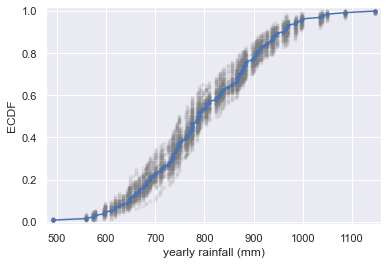

In [14]:
rainfall= """ 875.5  648.2  788.1  940.3  491.1  743.5  730.1  686.5  878.8  865.6
  654.9  831.5  798.1  681.8  743.8  689.1  752.1  837.2  710.6  749.2
  967.1  701.2  619.   747.6  803.4  645.6  804.1  787.4  646.8  997.1
  774.   734.5  835.   840.7  659.6  828.3  909.7  856.9  578.3  904.2
  883.9  740.1  773.9  741.4  866.8  871.1  712.5  919.2  927.9  809.4
  633.8  626.8  871.3  774.3  898.8  789.6  936.3  765.4  882.1  681.1
  661.3  847.9  683.9  985.7  771.1  736.6  713.2  774.5  937.7  694.5
  598.2  983.8  700.2  901.3  733.5  964.4  609.3 1035.2  718.   688.6
  736.8  643.3 1038.5  969.   802.7  876.6  944.7  786.6  770.4  808.6
  761.3  774.2  559.3  674.2  883.6  823.9  960.4  877.8  940.6  831.8
  906.2  866.5  674.1  998.1  789.3  915.   737.1  763.   666.7  824.5
  913.8  905.1  667.8  747.4  784.7  925.4  880.2 1086.9  764.4 1050.1
  595.2  855.2  726.9  785.2  948.8  970.6  896.   618.4  572.4 1146.4
  728.2  864.2  793."""

rainfall= rainfall.split()
df= pd.DataFrame(rainfall, columns=['rainfall'])
df['rainfall']= df.rainfall.astype('float')
rainfall= df['rainfall']

for a in range(50):
    # Generate bootstrap sample: bs_sample
    bs_sample = np.random.choice(rainfall, size=len(rainfall))

    # Compute and plot ECDF from bootstrap sample
    x, y = ecdf(bs_sample)
    _ = plt.plot(x, y, marker='.', linestyle='none',
                 color='gray', alpha=0.1)

# Compute and plot ECDF from original data
x, y = ecdf(rainfall)
_ = plt.plot(x, y, marker='.')

# Make margins and label axes
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')

# Show the plot
plt.show()

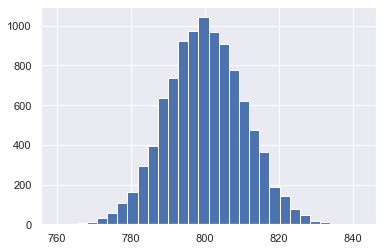

[779.63069549 821.27522556]


In [15]:
def bootstrap_replicate_1d(data, func):
    """Generate boostrap replicate of 1D data"""
    bs_sample= np.random.choice(data, len(data))
    return func(bs_sample)

bs_replicates= np.empty(10000)
for i in range(10000):
    bs_replicates[i]= bootstrap_replicate_1d(rainfall, np.mean)
    
plt.hist(bs_replicates, bins=30)
plt.show()

conf_int= np.percentile(bs_replicates, [2.5, 97.5])
print(conf_int)

10.510549150506188
10.57699091456034


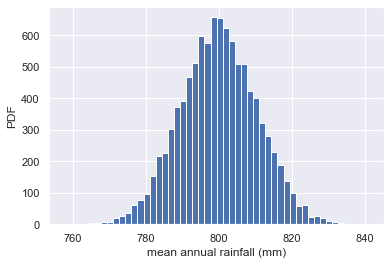

In [16]:
def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)

    return bs_replicates

# Take 10,000 bootstrap replicates of the mean: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.mean, size= 10000)

# Compute and print SEM
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print(sem)

# Compute and print standard deviation of bootstrap replicates
bs_std = bs_replicates.std()
print(bs_std)

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50)
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

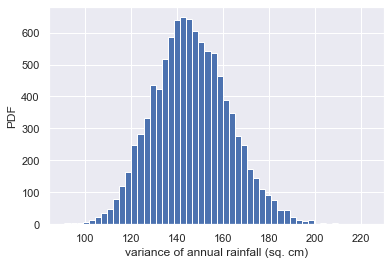

In [17]:
# Generate 10,000 bootstrap replicates of the variance: bs_replicates
bs_replicates = draw_bs_reps(rainfall, np.var, size=10000)

# Put the variance in units of square centimeters
bs_replicates= bs_replicates/100

# Make a histogram of the results
_ = plt.hist(bs_replicates, bins=50)
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()


95% confidence interval = [661.86733068 872.85786853] games


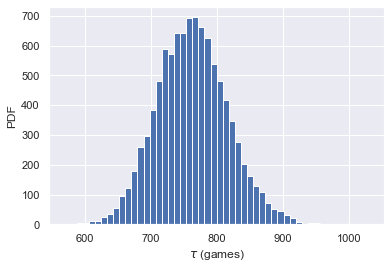

In [18]:
# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean, size=10000)

# Compute the 95% confidence interval: conf_int
conf_int = np.percentile(bs_replicates, [2.5, 97.5])

# Print the confidence interval
print('95% confidence interval =', conf_int, 'games')

# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50)
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')

# Show the plot
plt.show()

In [19]:
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""

    # Set up array of indices to sample from: inds
    inds = np.arange(len(x))

    # Initialize replicates: bs_slope_reps, bs_intercept_reps
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y, 1)

    return bs_slope_reps, bs_intercept_reps

[0.04409983 0.05509129]


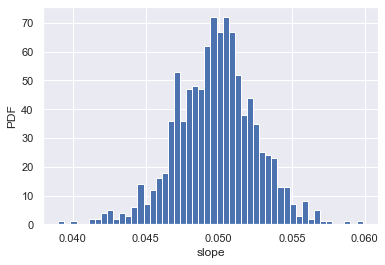

In [20]:
# Generate replicates of slope and intercept using pairs bootstrap
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, size=1000)

# Compute and print 95% CI for slope
print(np.percentile(bs_slope_reps, [2.5,97.5]))

# Plot the histogram
_ = plt.hist(bs_slope_reps, bins=50)
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()

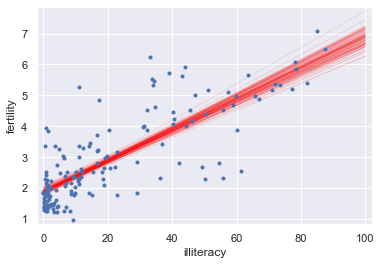

In [21]:
# Generate array of x-values for bootstrap lines: x
x = np.array([0,100])

# Plot the bootstrap lines
for i in range(100):
    _ = plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='red')

# Plot the data
_ = plt.plot(illiteracy, fertility, marker='.', linestyle='none')

# Label axes, set the margins, and show the plot
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

In [22]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2



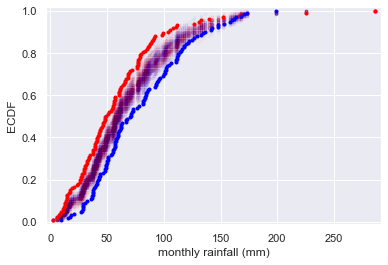

In [23]:
rain_june= """ 66.2  39.7  76.4  26.5  11.2  61.8   6.1  48.4  89.2 104.   34.   60.6
  57.1  79.1  90.9  32.3  63.8  78.2  27.5  43.4  30.1  17.3  77.5  44.9
  92.2  39.6  79.4  66.1  53.5  98.5  20.8  55.5  39.6  56.   65.1  14.8
  13.2  88.1   8.4  32.1  19.6  40.4   2.2  77.5 105.4  77.2  38.   27.1
 111.8  17.2  26.7  23.3  77.2  87.2  27.7  50.6  60.3  15.1   6.   29.4
  39.3  56.3  80.4  85.3  68.4  72.5  13.3  28.4  14.7  37.4  49.5  57.2
  85.9  82.1  31.8 126.6  30.7  41.4  33.9  13.5  99.1  70.2  91.8  61.3
  13.7  54.9  62.5  24.2  69.4  83.1  44.   48.5  11.9  16.6  66.4  90.
  34.9 132.8  33.4 225.    7.6  40.9  76.5  48.  140.   55.9  54.1  46.4
  68.6  52.2 108.3  14.6  11.3  29.8 130.9 152.4  61.   46.6  43.9  30.9
 111.1  68.5  42.2   9.8 285.6  56.7 168.2  41.2  47.8 166.6  37.8  45.4
  43.2 """

rain_june= rain_june.split()
rain_june= list(np.float_(rain_june))

rain_november= """83.6  30.9  62.2  37.   41.  160.2  18.2 122.4  71.3  44.2  49.1  37.6
 114.5  28.8  82.5  71.9  50.7  67.7 112.   63.6  42.8  57.2  99.1  86.4
  84.4  38.1  17.7 102.2 101.3  58.   82.  101.4  81.4 100.1  54.6  39.6
  57.5  29.2  48.8  37.3 115.4  55.6  62.   95.   84.2 118.1 153.2  83.4
 104.7  59.   46.4  50.  147.6  76.8  59.9 101.8 136.6 173.   92.5  37.
  59.8 142.1   9.9 158.2  72.6  28.  112.9 119.3 199.2  50.7  44.  170.7
  67.2  21.4  61.3  15.6 106.  116.2  42.3  38.5 132.5  40.8 147.5  93.9
  71.4  87.3 163.7 141.4  62.6  84.9  28.8 121.1  28.6  32.4 112.   50.
  96.9  81.8  70.4 117.5  41.2 124.9  78.2  93.   53.5  50.5  42.6  47.9
  73.1 129.1  56.9 103.3  60.5 134.3  93.1  49.5  48.2 167.9  27.  111.1
  55.4  36.2  57.4  66.8  58.3  60.  161.6 112.7  37.4 110.6  56.6  95.8
 126.8"""

rain_november= rain_november.split()
rain_november= np.float_(rain_november)


for i in range(50):
    # Generate permutation samples
    perm_sample_1, perm_sample_2 = permutation_sample(rain_june, rain_november)


    # Compute ECDFs
    x_1, y_1 = ecdf(perm_sample_1)
    x_2, y_2 = ecdf(perm_sample_2)

    # Plot ECDFs of permutation sample
    plt.plot(x_1, y_1, marker='.', linestyle='none',
                 color='red', alpha=0.02)
    plt.plot(x_2, y_2, marker='.', linestyle='none',
                 color='blue', alpha=0.02)

# Create and plot ECDFs from original data
x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
plt.plot(x_1, y_1, marker='.', linestyle='none', color='red')
plt.plot(x_2, y_2, marker='.', linestyle='none', color='blue')

# Label axes, set margin, and show plot
plt.margins(0.02)
plt.xlabel('monthly rainfall (mm)')
plt.ylabel('ECDF')
plt.show()

In [24]:
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

In [25]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)

    return diff

force_a= """1.612 0.605 0.327 0.946 0.541 1.539 0.529 0.628 1.453 0.297 0.703 0.269
 0.751 0.245 1.182 0.515 0.435 0.383 0.457 0.73 """

force_a= force_a.split()
force_a= np.float_(force_a)

force_b= """0.172 0.142 0.037 0.453 0.355 0.022 0.502 0.273 0.72  0.582 0.198 0.198
 0.597 0.516 0.815 0.402 0.605 0.711 0.614 0.468"""

force_b= force_b.split()
force_b= np.float_(force_b)

# Compute difference of mean impact force from experiment: empirical_diff_means
empirical_diff_means = diff_of_means(force_a, force_b)

# Draw 10,000 permutation replicates: perm_replicates
perm_replicates = draw_perm_reps(force_a, force_b,
                                 diff_of_means, size=10000)

# Compute p-value: p
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)

# Print the result
print('p-value =', p)

p-value = 0.0061


In [26]:
# Make an array of translated impact forces: translated_force_b
translated_force_b = force_b - np.mean(force_b) + 0.55

# Take bootstrap replicates of Frog B's translated impact forces: bs_replicates
bs_replicates = draw_bs_reps(translated_force_b, np.mean, 10000)

# Compute fraction of replicates that are less than the observed Frog B force: p
p = np.sum(bs_replicates <= np.mean(force_b)) / len(bs_replicates)

# Print the p-value
print('p = ', p)



forces_concat = np.concatenate((force_a, force_b))


# Compute mean of all forces: mean_force
mean_force = np.mean(forces_concat)

# Generate shifted arrays
force_a_shifted = force_a - np.mean(force_a) + mean_force
force_b_shifted = force_b - np.mean(force_b) + mean_force

# Compute 10,000 bootstrap replicates from shifted arrays
bs_replicates_a = draw_bs_reps(force_a_shifted, np.mean, size=10000)
bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, size=10000)

# Get replicates of difference of means: bs_replicates
bs_replicates = bs_replicates_a - bs_replicates_b

# Compute and print p-value: p
p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('p-value =', p)

p =  0.0056
p-value = 0.0064


In [27]:
# Construct arrays of data: dems, reps
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    """Compute fraction of Democrat yea votes."""
    frac = np.sum(dems) / len(dems)
    return frac

# Acquire permutation samples: perm_replicates
perm_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)

# Compute and print p-value: p
p = np.sum(perm_replicates <= 153/244) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0001


In [28]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)
print(r_obs)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

0.8041324026815347
p-val = 0.0


In [29]:
# Compute observed correlation: r_obs
r_obs = pearson_r(illiteracy, fertility)

# Initialize permutation replicates: perm_replicates
perm_replicates = np.empty(10000)

# Draw replicates
for i in range(10000):
    # Permute illiteracy measurments: illiteracy_permuted
    illiteracy_permuted = np.random.permutation(illiteracy)

    # Compute Pearson correlation
    perm_replicates[i] = pearson_r(illiteracy_permuted, fertility)

# Compute p-value: p
p = np.sum(perm_replicates >= r_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


In [33]:
df= pd.read_csv('scandens_beak_depth_heredity.csv')
df

,mid_parent,mid_offspring
0,8.3318,8.4190
1,8.4035,9.2468
2,8.5317,8.1532
3,8.7202,8.0089
4,8.7089,8.2215
...,...,...
125,9.6516,9.4899
126,9.7572,9.5962
127,9.8854,9.6873
128,10.0023,9.5203
